# Import Required Libraries:

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

# Load and Preprocess the Data:

In [2]:
# Load the dataset
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [3]:
df.shape

(284807, 31)

In [4]:
# Perform preprocessing
nans_by_col = df.isna().sum()
print("nans_by_col shape:", nans_by_col.shape)
nans_by_col.head()

nans_by_col shape: (31,)


Time    0
V1      0
V2      0
V3      0
V4      0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.shape

(284807, 31)

In [6]:
df.duplicated().sum()

1081

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(283726, 31)

# Explore

In [8]:
# Inspect DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

<Axes: title={'center': 'Class Balance'}, xlabel='Class', ylabel='Frequency'>

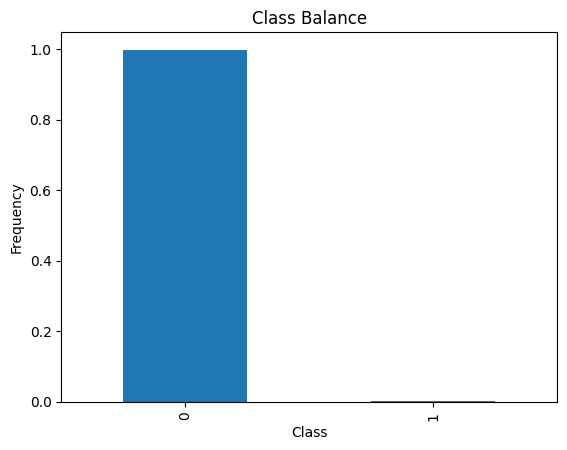

In [9]:
# Plot class balance
df["Class"].value_counts(normalize=True).plot(kind="bar", xlabel="Class", ylabel="Frequency", 
                                              title="Class Balance")

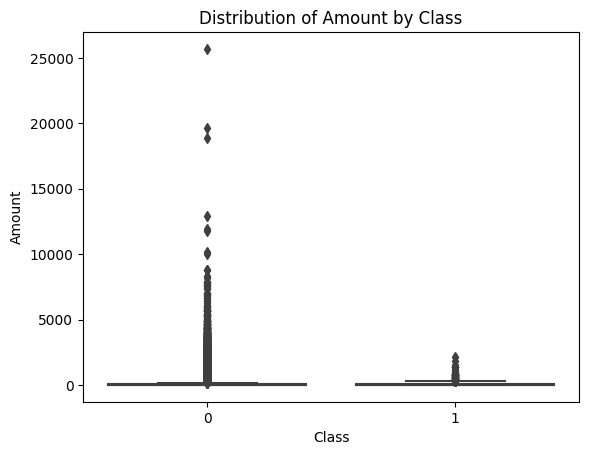

In [10]:
# Create boxplot
sns.boxplot(x="Class", y="Amount", data=df)
plt.xlabel("Class")
plt.ylabel("Amount")
plt.title("Distribution of Amount by Class");

# Split the data into features (X) and target variable (y)

In [11]:
target = "Class"
X = df.drop(columns=target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (283726, 30)
y shape: (283726,)


# Split the Data into Training and Testing Sets:

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (226980, 30)
y_train shape: (226980,)
X_test shape: (56746, 30)
y_test shape: (56746,)


# Resample

## Perform random under-sampling on training data.

In [13]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print(X_train_under.shape)
X_train_under.head()

(766, 30)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
251191,155265.0,-9.048285,-12.164369,-1.049143,1.962414,0.794992,-0.958681,3.435171,0.072406,0.136746,...,6.263003,1.417399,-1.722474,6.128970,0.223228,1.701644,-1.116437,-0.935423,0.360251,2142.84
95289,65241.0,-1.197153,0.583832,1.220539,-1.513086,-0.652989,-1.122744,0.259003,-0.095126,-0.913726,...,0.028642,0.150543,0.648682,-0.116473,0.783712,0.135085,-0.403938,-0.297093,-0.127144,13.33
211835,138590.0,1.832038,-0.319843,-2.146684,0.209544,0.537048,-0.199772,0.081217,-0.020316,0.817943,...,0.074688,-0.190473,-0.599122,0.040793,-0.039583,-0.036768,-0.112957,-0.035663,-0.010135,113.20
36480,38557.0,-1.014511,0.835772,0.627184,0.061740,-1.563005,-0.067625,1.542709,0.198962,-0.883058,...,-0.167979,0.023315,-0.142992,0.317220,0.521025,-0.601159,0.027459,-0.040127,0.009693,299.00
258327,158602.0,-1.419903,1.543222,-1.760903,-1.475705,1.575405,-0.805657,1.259079,-1.093809,0.688834,...,-0.117434,0.717442,0.410197,0.079251,-0.090300,-0.026991,0.086180,0.276683,-0.135149,0.77


# Build Model

In [14]:
clf = GradientBoostingClassifier(random_state=42)

#### Perform cross-validation with classifier using the under-sampled training data, and assign  results to cv_scores.

In [15]:
cv_scores = cross_val_score(clf, X_train_under, y_train_under, cv=5, n_jobs=-1)
print(cv_scores)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[0.94805195 0.90849673 0.94117647 0.95424837 0.94771242]


In [16]:
params = {"max_depth": range(2,5),"n_estimators": range(20, 31, 5)}

#### Create a GridSearchCV named model that includes classifier and hyperparameter grid.

In [17]:
model = GridSearchCV(clf, param_grid=params, cv=5, n_jobs=-1, verbose=1)

## Fit model to the under-sampled training data.

In [18]:
model.fit(X_train_under, y_train_under)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(2, 5),
                         'n_estimators': range(20, 31, 5)},
             verbose=1)

### Extract the cross-validation results from model, and load them into a DataFrame named cv_results

In [19]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.130375,0.002889,0.004752,0.000836,2,20,"{'max_depth': 2, 'n_estimators': 20}",0.948052,0.888889,0.941176,0.947712,0.921569,0.929480,0.022469,4
1,0.162070,0.003150,0.004347,0.000153,2,25,"{'max_depth': 2, 'n_estimators': 25}",0.941558,0.888889,0.941176,0.941176,0.934641,0.929488,0.020463,3
2,0.191572,0.003709,0.004265,0.000145,2,30,"{'max_depth': 2, 'n_estimators': 30}",0.941558,0.888889,0.941176,0.954248,0.941176,0.933410,0.022818,1
3,0.265608,0.043985,0.009876,0.007273,3,20,"{'max_depth': 3, 'n_estimators': 20}",0.948052,0.888889,0.928105,0.928105,0.915033,0.921637,0.019481,9
4,0.247448,0.027896,0.004541,0.000453,3,25,"{'max_depth': 3, 'n_estimators': 25}",0.948052,0.888889,0.941176,0.928105,0.928105,0.926865,0.020489,5


### Extract the best hyperparameters from model and assign them to best_params.

In [20]:
best_params = model.best_params_
print(best_params)

{'max_depth': 2, 'n_estimators': 30}


# Evaluate the Model:

In [21]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = accuracy_score(y_test, model.predict(X_test))

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9712
Test Accuracy: 0.971


Confusion Matrix:


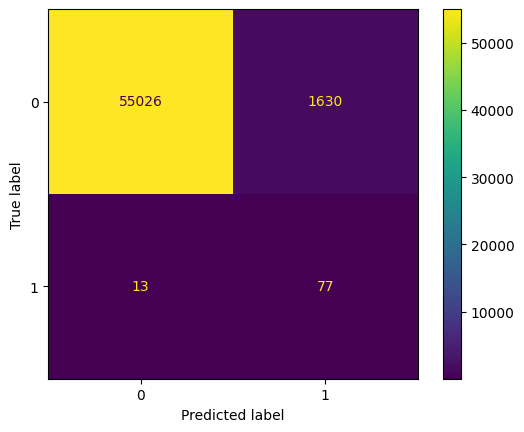

In [22]:
# Plot confusion matrix
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [23]:
class_report = classification_report(y_test, model.predict(X_test))
print("Classification Report")
print(class_report)

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56656
           1       0.05      0.86      0.09        90

    accuracy                           0.97     56746
   macro avg       0.52      0.91      0.54     56746
weighted avg       1.00      0.97      0.98     56746

